In [3]:

import os
import numpy as np
from matplotlib import pyplot
from skimage.transform import resize
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D  
from scipy.io import loadmat

from PIL import Image

%matplotlib inline

In [74]:
data = np.loadtxt(os.path.join('images', 'test.csv'), delimiter=',',dtype=str)
X, y ,pat= data[1:2251, :6], data[1:2251, 6], data[1:2251,7:]

m=y.size
print(X.shape)
print(pat.shape)
X=np.concatenate([X,pat], axis=1)
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[wid0]','X[hei1]','X[ulx2]', 'X[uly3]', 'X[lrx4]', 'X[lry5]', 'y'))
for i in range(100):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(float(X[i, 0]),float(X[i, 1]),float(X[i, 2]),float(X[i, 3]),float(X[i, 4]),float(X[i, 5]), float(y[i])))

print(X)
y=y.astype(int)
y[y == 43] = 0
print(y)
print(m)


(2250, 6)
(2250, 1)
 X[wid0] X[hei1] X[ulx2] X[uly3] X[lrx4] X[lry5]         y
      53      54       6       5      48      49        16
      42      45       5       5      36      40         1
      48      52       6       6      43      47        38
      27      29       5       5      22      24        33
      60      57       5       5      55      52        11
      52      56       5       5      47      51        38
     147     130      12      12     135     119        18
      32      33       5       5      26      28        12
      45      50       6       5      40      45        25
      81      86       7       7      74      79        35
      38      37       6       5      33      32        12
      45      44       6       5      40      39         7
      79      73       7       7      72      67        23
      36      37       5       6      31      32         7
      43      41       5       5      37      36         4
      27      27       6       6    

In [75]:
Xp=np.zeros((1,30000))
for i in range(m):
    img=Image.open('images/'+X[i, 6])
    img=np.array(img)
    imgresz=resize(img,(100,100))
    imgresz=np.reshape(imgresz,(30000,1)).T
    Xp=np.append(Xp,imgresz,axis=0)
Xp=Xp[1:,:]
print(Xp)
print(Xp.shape)

[[0.45397196 0.54505039 0.68201961 ... 0.44893    0.54809804 0.67086275]
 [0.24611176 0.28293529 0.23993627 ... 0.2936098  0.27437157 0.2752549 ]
 [0.20217725 0.15495216 0.14694275 ... 0.18468706 0.17982431 0.17149176]
 ...
 [0.69502157 0.5690902  0.62573333 ... 0.06796078 0.061      0.07582353]
 [0.17105039 0.17641941 0.14830529 ... 0.09587431 0.08907039 0.09414882]
 [0.31983892 0.29377637 0.28087814 ... 0.19839912 0.21369745 0.29793745]]
(2250, 30000)


In [77]:
def displayData(X,nar, example_width=None, figsize=(10, 10)):

    if X.ndim == 2:
        m= X.shape[0]
        nrow=X[:,0]
        ncol=X[:,1]
    elif X.ndim == 1:
        nrow=X[:,0]
        ncol=X[:,1]
        m = 1
        X = X[None]
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')
    print(X.shape[0])
    
    
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        img=Image.open('images/'+X[i, nar])
        img=np.array(img)
        imgresz=resize(img,(100,100))
        ax.imshow(imgresz, extent=[0, 1, 0, 1])
        ax.axis('off')

In [87]:
datam = np.loadtxt(os.path.join('images', 'meta.csv'), delimiter=',',dtype=str)
Xm ,patm= datam[1:, :1], datam[1:,1:2]

mm=Xm.size
patm[0] = 43
print(patm)
print(Xm.shape)
print(patm.shape)
Xm=np.concatenate([Xm,patm], axis=1)

print(Xm)
print(mm)


[['43']
 ['1']
 ['2']
 ['3']
 ['4']
 ['5']
 ['6']
 ['7']
 ['8']
 ['9']
 ['10']
 ['11']
 ['12']
 ['13']
 ['14']
 ['15']
 ['16']
 ['17']
 ['18']
 ['19']
 ['20']
 ['21']
 ['22']
 ['23']
 ['24']
 ['25']
 ['26']
 ['27']
 ['28']
 ['29']
 ['30']
 ['31']
 ['32']
 ['33']
 ['34']
 ['35']
 ['36']
 ['37']
 ['38']
 ['39']
 ['40']
 ['41']
 ['42']]
(43, 1)
(43, 1)
[['Meta/0.png' '43']
 ['Meta/1.png' '1']
 ['Meta/2.png' '2']
 ['Meta/3.png' '3']
 ['Meta/4.png' '4']
 ['Meta/5.png' '5']
 ['Meta/6.png' '6']
 ['Meta/7.png' '7']
 ['Meta/8.png' '8']
 ['Meta/9.png' '9']
 ['Meta/10.png' '10']
 ['Meta/11.png' '11']
 ['Meta/12.png' '12']
 ['Meta/13.png' '13']
 ['Meta/14.png' '14']
 ['Meta/15.png' '15']
 ['Meta/16.png' '16']
 ['Meta/17.png' '17']
 ['Meta/18.png' '18']
 ['Meta/19.png' '19']
 ['Meta/20.png' '20']
 ['Meta/21.png' '21']
 ['Meta/22.png' '22']
 ['Meta/23.png' '23']
 ['Meta/24.png' '24']
 ['Meta/25.png' '25']
 ['Meta/26.png' '26']
 ['Meta/27.png' '27']
 ['Meta/28.png' '28']
 ['Meta/29.png' '29']
 ['Meta

42


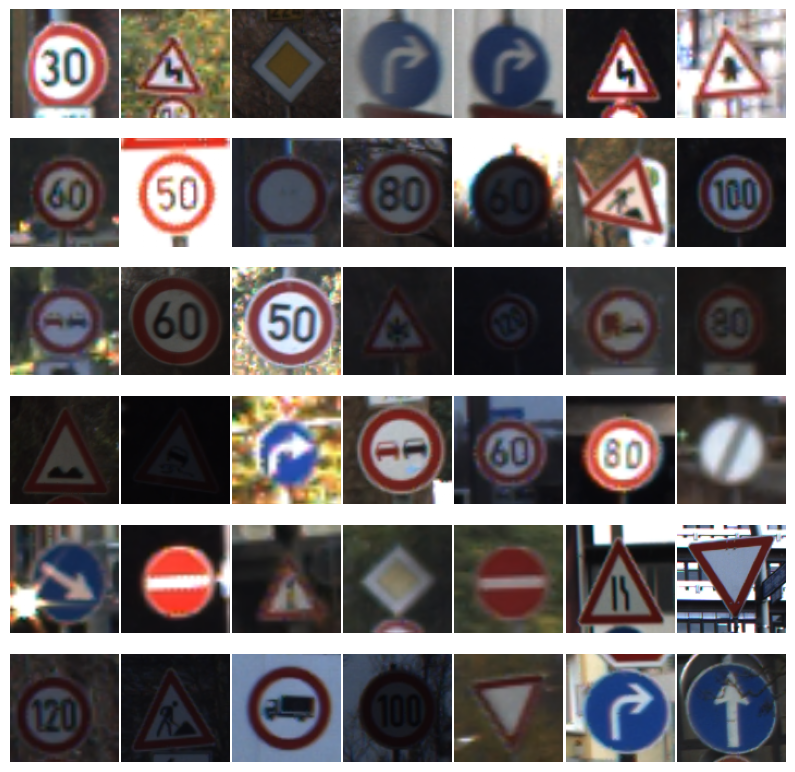

In [91]:
rand_indices = np.random.choice(100, 42, replace=False)
sel = X[rand_indices, :]
displayData(sel,6)

In [92]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [106]:
def lrCostFunction(theta, X, y, lambda_):
   
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    temp = theta
    temp[0] = 0
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    grad = (1 / m) * (h - y).dot(X) 
    grad = grad + (lambda_ / m) * temp

    return J, grad

In [107]:
def oneVsAll(X, y, num_labels, lambda_):

    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options) 
        
        all_theta[c] = res.x

    return all_theta

In [108]:
lambda_ = 0.1
all_theta = oneVsAll(Xp, y, 43, lambda_)
print(all_theta)

C:\Users\Diego-pc\AppData\Local\Temp\ipykernel_8140\4003175295.py:11: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\Diego-pc\AppData\Local\Temp\ipykernel_8140\4003175295.py:11: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\Diego-pc\AppData\Local\Temp\ipykernel_8140\4003175295.py:11: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\Diego-pc\AppData\Local\Temp\ipykernel_8140\4003175295.py:11: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\Diego-pc\AppData\Local\Temp\ipykern

[[-0.01792995 -0.00615529 -0.00604401 ... -0.00505712 -0.0048855
  -0.00481568]
 [-0.76082534 -0.02803201 -0.00258886 ...  0.00162115 -0.00133477
  -0.01690964]
 [-0.96818531  0.02020904  0.00518237 ...  0.02192986  0.01443363
   0.02019853]
 ...
 [-0.54916364 -0.00201079  0.00203766 ...  0.0045365   0.00790562
  -0.00394956]
 [-1.28644684 -0.00442815 -0.00514853 ... -0.01288263 -0.01347451
  -0.02026711]
 [-0.34295955 -0.02480366 -0.01528577 ...  0.01171077  0.00305501
  -0.00230811]]


In [109]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    p = np.zeros(m)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [112]:
Xpr, ypr ,patpr= data[4201:4301, :6], data[4201:4301, 6], data[4201:4301,7:]

mpr=ypr.size
print(Xpr.shape)
print(patpr.shape)
Xpr=np.concatenate([Xpr,patpr], axis=1)
print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(float(X[i, 0]),float(X[i, 1]),float(X[i, 2]),float(X[i, 3]),float(X[i, 4]),float(X[i, 5]), float(y[i])))
print(Xpr)
ypr=ypr.astype(int)
print(ypr)
print(mpr)

Xprue=np.zeros((1,30000))
for i in range(mpr):
    img=Image.open('images/'+Xpr[i, 6])
    img=np.array(img)
    imgresz=resize(img,(100,100))
    imgresz=np.reshape(imgresz,(30000,1)).T
    print(i)
    Xprue=np.append(Xprue,imgresz,axis=0)
Xprue=Xprue[1:,:]
print(Xprue)
print(Xprue.shape)

(100, 6)
(100, 1)
      53      54       6       5      48      49        16
[['58' '59' '5' '5' '53' '54' 'Test/04200.png']
 ['37' '38' '6' '6' '32' '32' 'Test/04201.png']
 ['41' '38' '5' '5' '36' '33' 'Test/04202.png']
 ['28' '27' '6' '5' '23' '22' 'Test/04203.png']
 ['30' '30' '6' '6' '25' '25' 'Test/04204.png']
 ['45' '45' '6' '5' '40' '40' 'Test/04205.png']
 ['41' '41' '6' '6' '36' '36' 'Test/04206.png']
 ['34' '37' '5' '6' '29' '31' 'Test/04207.png']
 ['39' '39' '6' '6' '34' '34' 'Test/04208.png']
 ['57' '51' '6' '6' '52' '46' 'Test/04209.png']
 ['71' '69' '7' '6' '65' '63' 'Test/04210.png']
 ['26' '29' '5' '6' '21' '24' 'Test/04211.png']
 ['31' '32' '6' '6' '26' '27' 'Test/04212.png']
 ['141' '124' '13' '10' '129' '114' 'Test/04213.png']
 ['27' '29' '5' '5' '22' '24' 'Test/04214.png']
 ['37' '41' '5' '6' '32' '35' 'Test/04215.png']
 ['48' '46' '5' '5' '43' '41' 'Test/04216.png']
 ['41' '40' '6' '6' '36' '35' 'Test/04217.png']
 ['52' '51' '6' '6' '47' '46' 'Test/04218.png']
 ['33

(2250, 30000)
Precision del conjuto de entrenamiento: 97.29%
(100, 30000)
(100, 30001)
[ 2 12 13 16  5  2 10  5 31 12 14 17 17 13 17 16 31 11 26 12 13  7 13  2
 18  8  7  2  9 38  9 13 13  3  2  8  2  8 13 38  7 18  4 14 38  5 38 12
 25  5 25 11  1  5 14 12 13  5 13  9  1 25  7 12 35 15  1  3 31 17 13  4
  8 25  4 38 18 10 36 17 13  3 12  4  1  2  5 17  9 25 29 35 29 35 15  2
 35 11  4 26]
100
(1, 202)
[['0.0' '0.0']
 ['2' 'Meta/2.png']
 ['12' 'Meta/12.png']
 ['13' 'Meta/13.png']
 ['16' 'Meta/16.png']
 ['5' 'Meta/5.png']
 ['2' 'Meta/2.png']
 ['10' 'Meta/10.png']
 ['5' 'Meta/5.png']
 ['31' 'Meta/31.png']
 ['12' 'Meta/12.png']
 ['14' 'Meta/14.png']
 ['17' 'Meta/17.png']
 ['17' 'Meta/17.png']
 ['13' 'Meta/13.png']
 ['17' 'Meta/17.png']
 ['16' 'Meta/16.png']
 ['31' 'Meta/31.png']
 ['11' 'Meta/11.png']
 ['26' 'Meta/26.png']
 ['12' 'Meta/12.png']
 ['13' 'Meta/13.png']
 ['7' 'Meta/7.png']
 ['13' 'Meta/13.png']
 ['2' 'Meta/2.png']
 ['18' 'Meta/18.png']
 ['8' 'Meta/8.png']
 ['7' 'Meta/7.png']
 

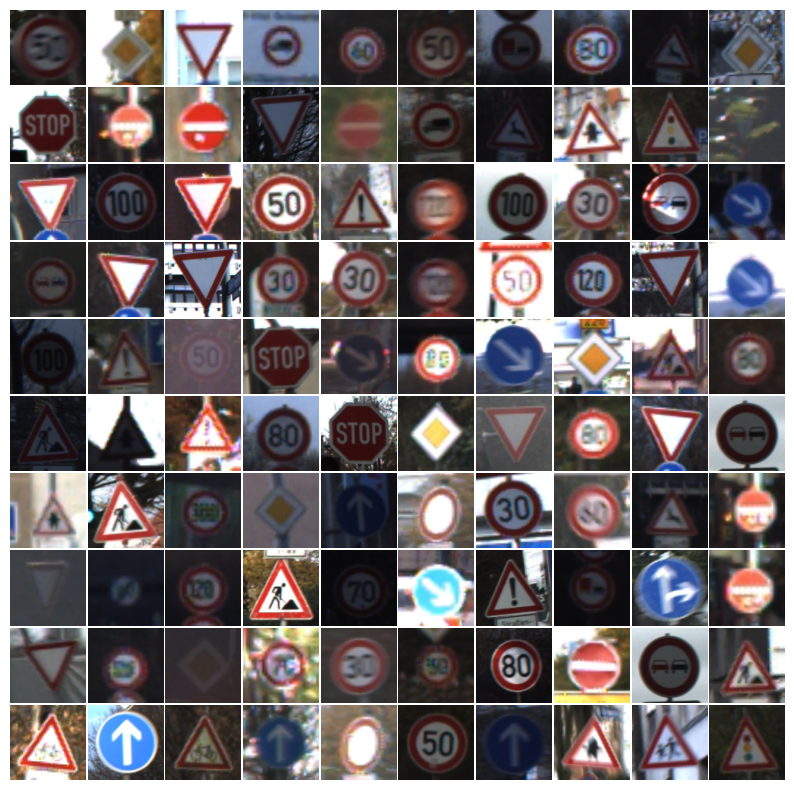

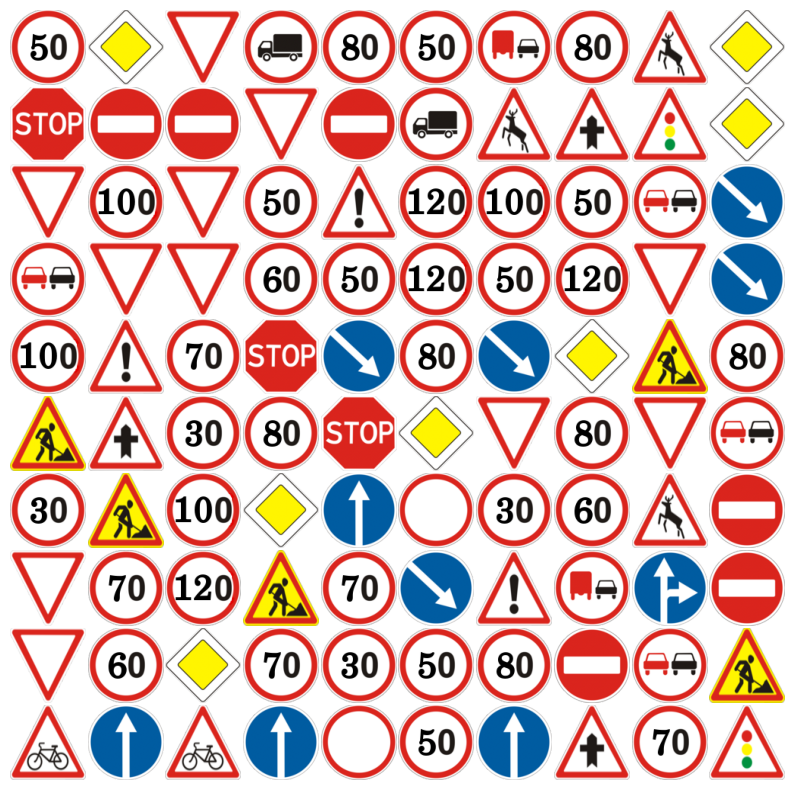

In [113]:
print(Xp.shape)
pred = predictOneVsAll(all_theta, Xp)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = Xprue.copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((100, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

displayData(Xpr,6)

Xo=np.zeros((1,2))
for i in range(p.size):
    for j in range(43):
        if(p[i]==j):
            Xc=np.array([p[i],str(Xm[p[i],0])])
            Xc=Xc[None]
            Xo=np.concatenate((Xo,Xc),axis=1)
            break
print(Xo.shape)        
Xo=np.reshape(Xo,(p.size+1,2))
print(Xo)
displayData(Xo[1:, :],1)
